In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

np.random.seed(42)

# Load MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

# Convert Series to numpy array
y_np = y.to_numpy()

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y_np.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

# Convert DataFrames to NumPy arrays (fix for softmax keepdims)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print("Training samples:", X_train.shape, "Test samples:", X_test.shape)


Training samples: (56000, 784) Test samples: (14000, 784)


In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [ ]:
input_size = 784  # MNIST flattened
hidden_size = 64
output_size = 10
lr = 0.01

# Weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [ ]:
def forward(X):
    global z1, a1, z2, a2
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = softmax(z2)
    return a2


In [ ]:
def cross_entropy(y_pred, y_true):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
    return loss


In [ ]:
def backward(X, y_true, y_pred):
    global W1, b1, W2, b2
    m = y_true.shape[0]

    dz2 = (y_pred - y_true) / m
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2 @ W2.T * relu_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2


In [ ]:
epochs = 20
loss_history = []

for i in range(epochs):
    y_pred = forward(X_train)
    loss = cross_entropy(y_pred, y_train)
    loss_history.append(loss)
    backward(X_train, y_train, y_pred)

    if (i+1) % 5 == 0:
        print(f"Epoch {i+1}/{epochs}, Loss: {loss:.4f}")


Epoch 5/20, Loss: 2.3025
Epoch 10/20, Loss: 2.3022
Epoch 15/20, Loss: 2.3019
Epoch 20/20, Loss: 2.3016


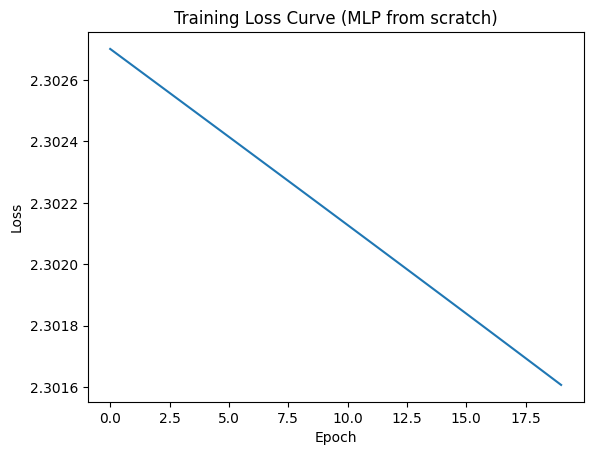

In [ ]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (MLP from scratch)")
plt.show()


In [ ]:
y_pred_test = forward(X_test)
y_pred_labels = np.argmax(y_pred_test, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_true_labels, y_pred_labels))


Test Accuracy: 0.12714285714285714
